# ML STARTS

In [64]:
import numpy as np
import pandas as pd

In [65]:
df=pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


## Steps

- 0. Preprocess + EDA + Feature Selection
- 1. Extract input and output cols
- 2. Scale the values
- 3. Train test split
- 4. Train the model
- 5. Evaluate the model/model selection
- 6. Deploy the model

In [66]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [67]:
import matplotlib.pyplot as plt

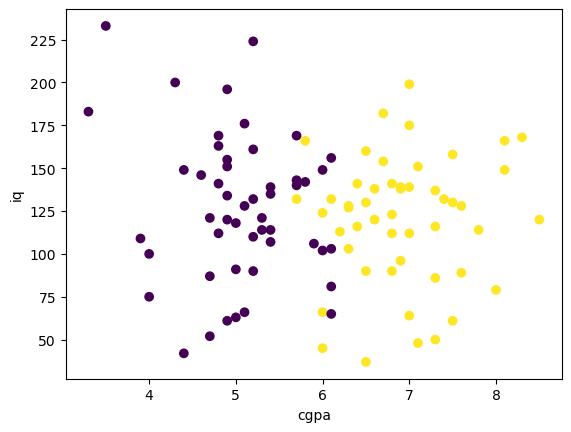

In [68]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('cgpa',)
plt.ylabel('iq')
plt.show()

In [69]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [71]:
x_train

,cgpa,iq,placement
24,4.7,121.0,0
37,8.1,149.0,1
85,5.8,166.0,1
89,4.9,151.0,0
23,4.7,87.0,0
...,...,...,...
81,5.4,107.0,0
45,6.0,66.0,1
72,7.3,116.0,1
65,8.1,166.0,1


In [72]:
y_train

24    0
37    1
85    1
89    0
23    0
     ..
81    0
45    1
72    1
65    1
36    0
Name: placement, Length: 90, dtype: int64

In [73]:
y_train.squeeze()

24    0
37    1
85    1
89    0
23    0
     ..
81    0
45    1
72    1
65    1
36    0
Name: placement, Length: 90, dtype: int64

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [75]:
x_train=sc.fit_transform(x_train)
x_train

array([[-1.15927583e+00, -7.22557150e-02, -1.00000000e+00],
       [ 1.87008714e+00,  6.44612008e-01,  1.00000000e+00],
       [-1.79187809e-01,  1.07985313e+00,  1.00000000e+00],
       [-9.81078005e-01,  6.95816846e-01, -1.00000000e+00],
       [-1.15927583e+00, -9.42737950e-01, -1.00000000e+00],
       [ 4.44504565e-01,  1.58166053e-01,  1.00000000e+00],
       [ 8.89999119e-01, -1.53159358e+00,  1.00000000e+00],
       [-8.02880184e-01,  1.06961216e-01, -1.00000000e+00],
       [-7.13781273e-01, -8.65930694e-01, -1.00000000e+00],
       [-8.02880184e-01,  1.33587731e+00, -1.00000000e+00],
       [ 2.66306744e-01,  8.13587972e-02,  1.00000000e+00],
       [ 4.44504565e-01, -8.65930694e-01,  1.00000000e+00],
       [ 7.11801297e-01, -3.02677483e-01,  1.00000000e+00],
       [ 8.00900208e-01, -7.12316182e-01,  1.00000000e+00],
       [ 7.11801297e-01,  4.39792659e-01,  1.00000000e+00],
       [-1.42657256e+00,  6.44612008e-01, -1.00000000e+00],
       [-8.02880184e-01, -1.48038874e+00

In [76]:
x_test=sc.transform(x_test)
x_test

array([[ 0.26630674,  0.10696122,  1.        ],
       [ 0.35540565, -0.20026781,  1.        ],
       [-0.89197909, -0.14906297, -1.        ],
       [ 1.78098822, -1.1475573 ,  1.        ],
       [-0.53558345,  0.38858782, -1.        ],
       [ 0.17720783, -0.27707506,  1.        ],
       [ 0.08810892, -1.09635246, -1.        ],
       [-2.22846275,  2.79521518, -1.        ],
       [-1.24837474,  0.56780475, -1.        ],
       [ 1.33549367, -1.60840084,  1.        ]])

In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [78]:
#model training
lr.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [79]:
y_pred=lr.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0